In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/PARTH/Downloads/youtube_shorts_performance_dataset.csv")
df.head()

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category
0,vid_1000,Short Video #0,43,9,198775,21933,3228,400,8,Tech
1,vid_1001,Short Video #1,56,2,290336,20063,3719,1942,16,Comedy
2,vid_1002,Short Video #2,33,6,264206,37032,3228,1817,7,Food
3,vid_1003,Short Video #3,19,9,85076,27269,2371,980,1,Lifestyle
4,vid_1004,Short Video #4,47,8,90780,8041,2891,1109,23,Tech


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        300 non-null    object
 1   title           300 non-null    object
 2   duration_sec    300 non-null    int64 
 3   hashtags_count  300 non-null    int64 
 4   views           300 non-null    int64 
 5   likes           300 non-null    int64 
 6   comments        300 non-null    int64 
 7   shares          300 non-null    int64 
 8   upload_hour     300 non-null    int64 
 9   category        300 non-null    object
dtypes: int64(7), object(3)
memory usage: 23.6+ KB


In [36]:
df['likes_per_view'] = df['likes'] / df['views']

# EDA

In [4]:
df.describe( include='all')

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category
count,300,300,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300
unique,300,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,vid_1000,Short Video #0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
mean,NaN,NaN,31.730000,4.343333,245058.166667,23063.126667,2638.296667,999.576667,11.543333,NaN
std,NaN,NaN,16.042912,2.956562,141338.982093,14597.458220,1416.827287,564.410105,6.814414,NaN
min,NaN,NaN,5.000000,0.000000,1404.000000,109.000000,40.000000,2.000000,0.000000,NaN
25%,NaN,NaN,18.000000,2.000000,129620.500000,10342.000000,1445.750000,516.250000,6.000000,NaN
50%,NaN,NaN,32.000000,4.000000,255962.000000,21779.500000,2863.500000,988.000000,12.000000,NaN
75%,NaN,NaN,45.000000,7.000000,356805.000000,36706.500000,3761.000000,1463.750000,17.000000,NaN


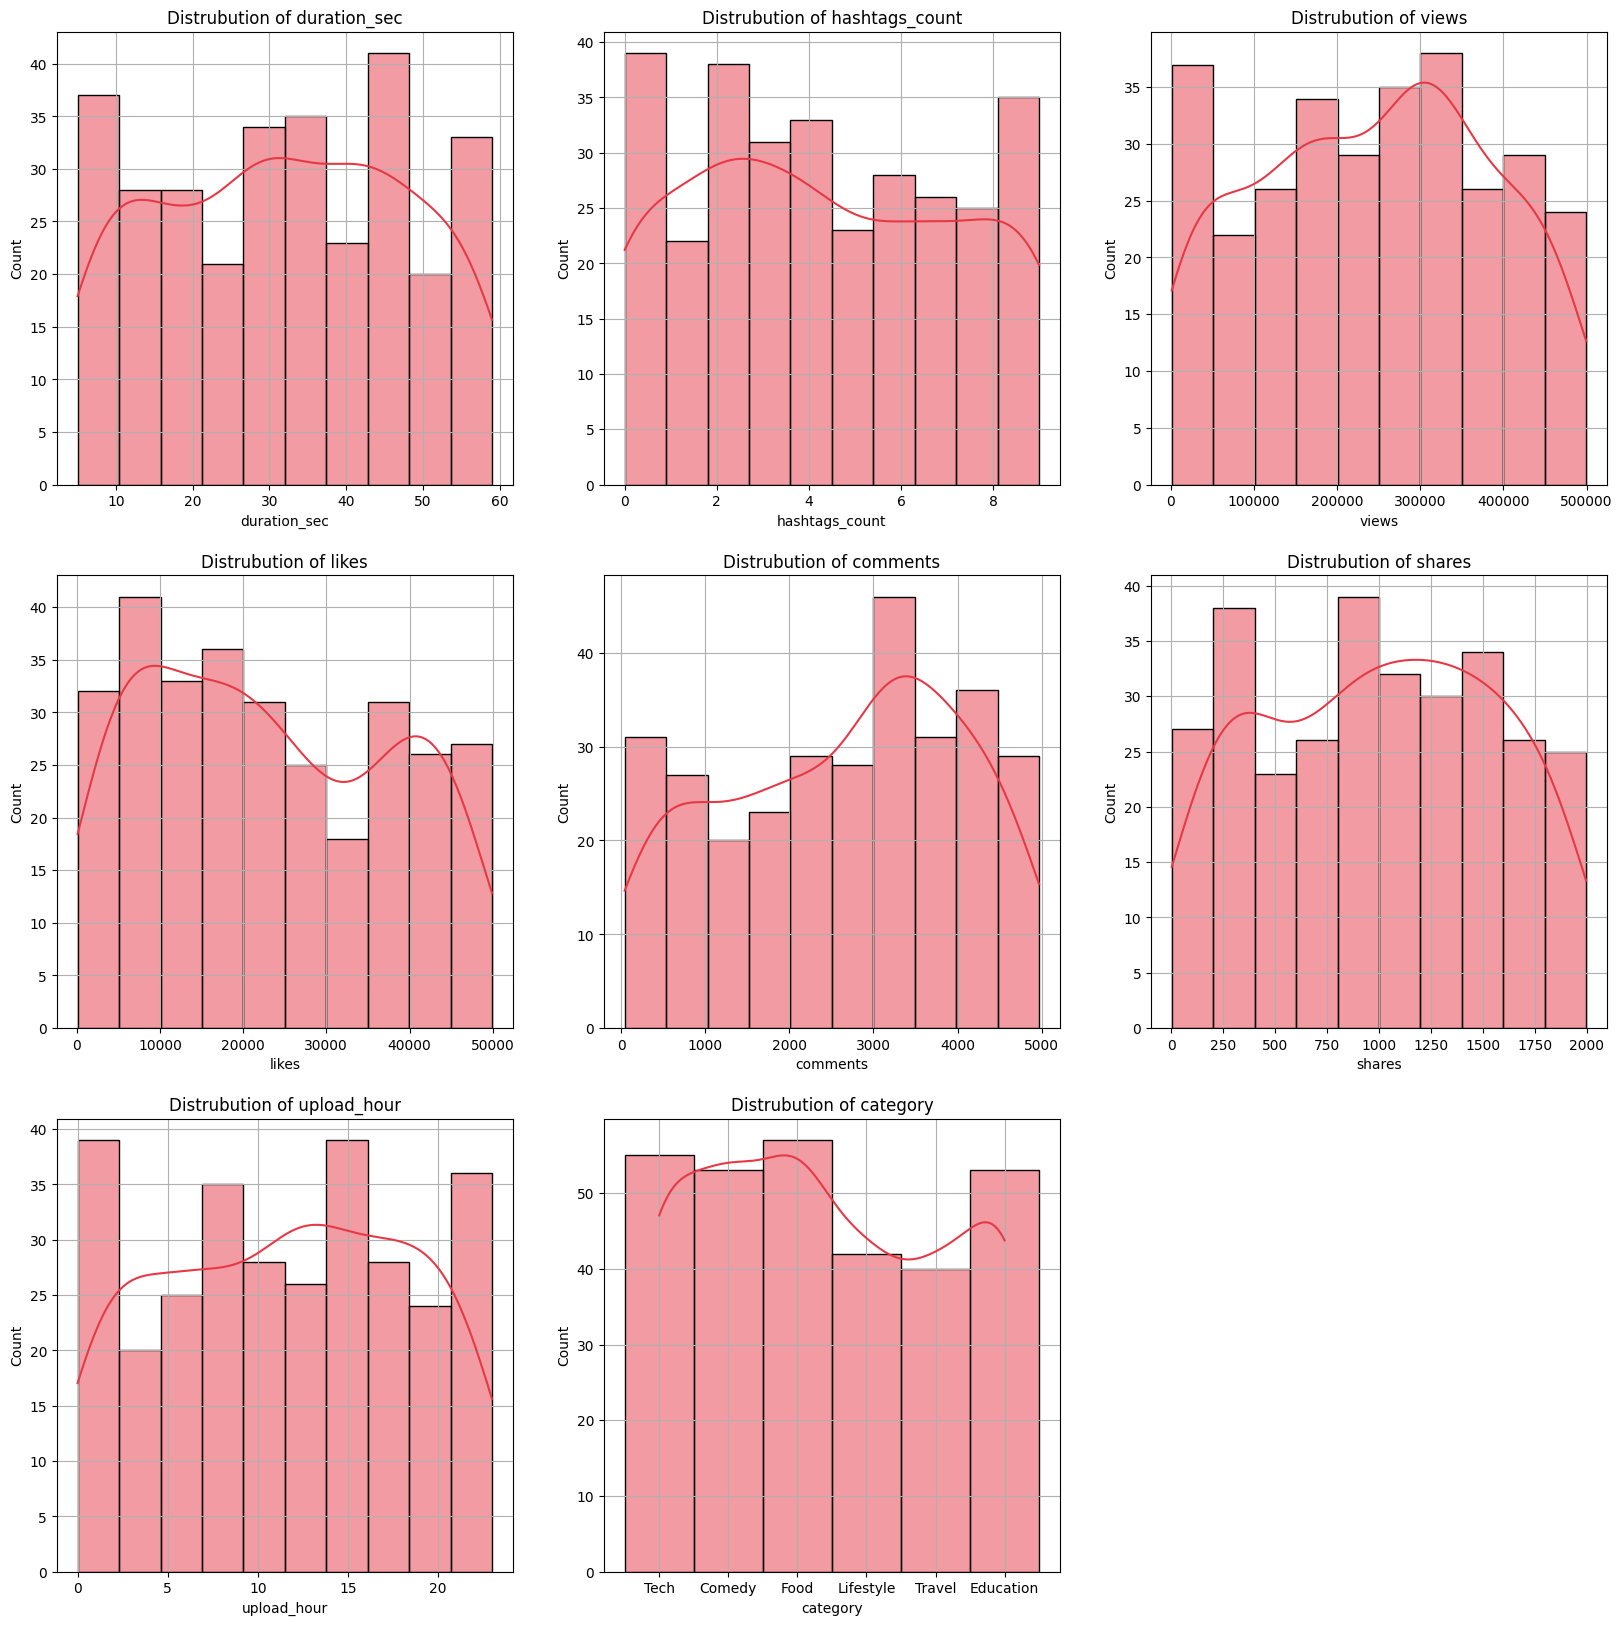

In [32]:
columns = ['duration_sec','hashtags_count','views','likes','comments','shares','upload_hour','category']

plt.figure(figsize=(20,20))
for i, col in enumerate(columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True, color='#E63946')
    plt.title(f'Distrubution of {col}')
    plt.grid(True)
plt.show()

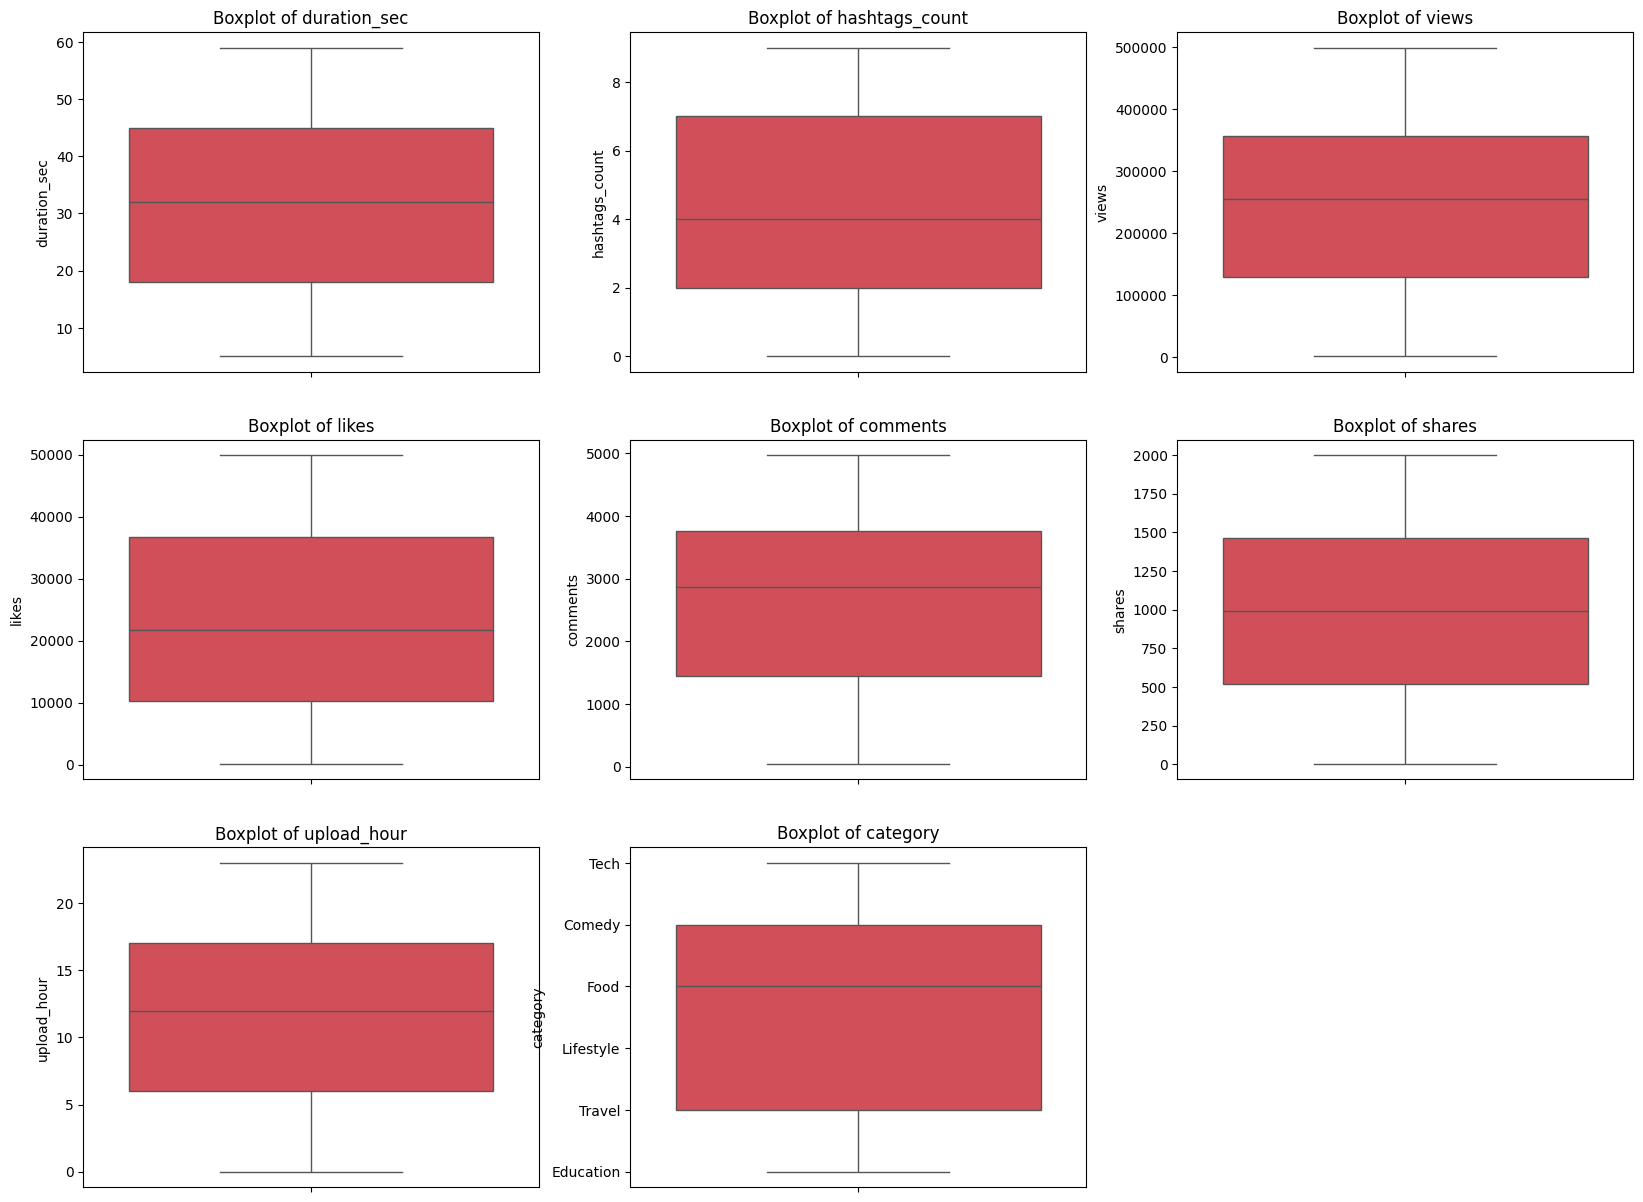

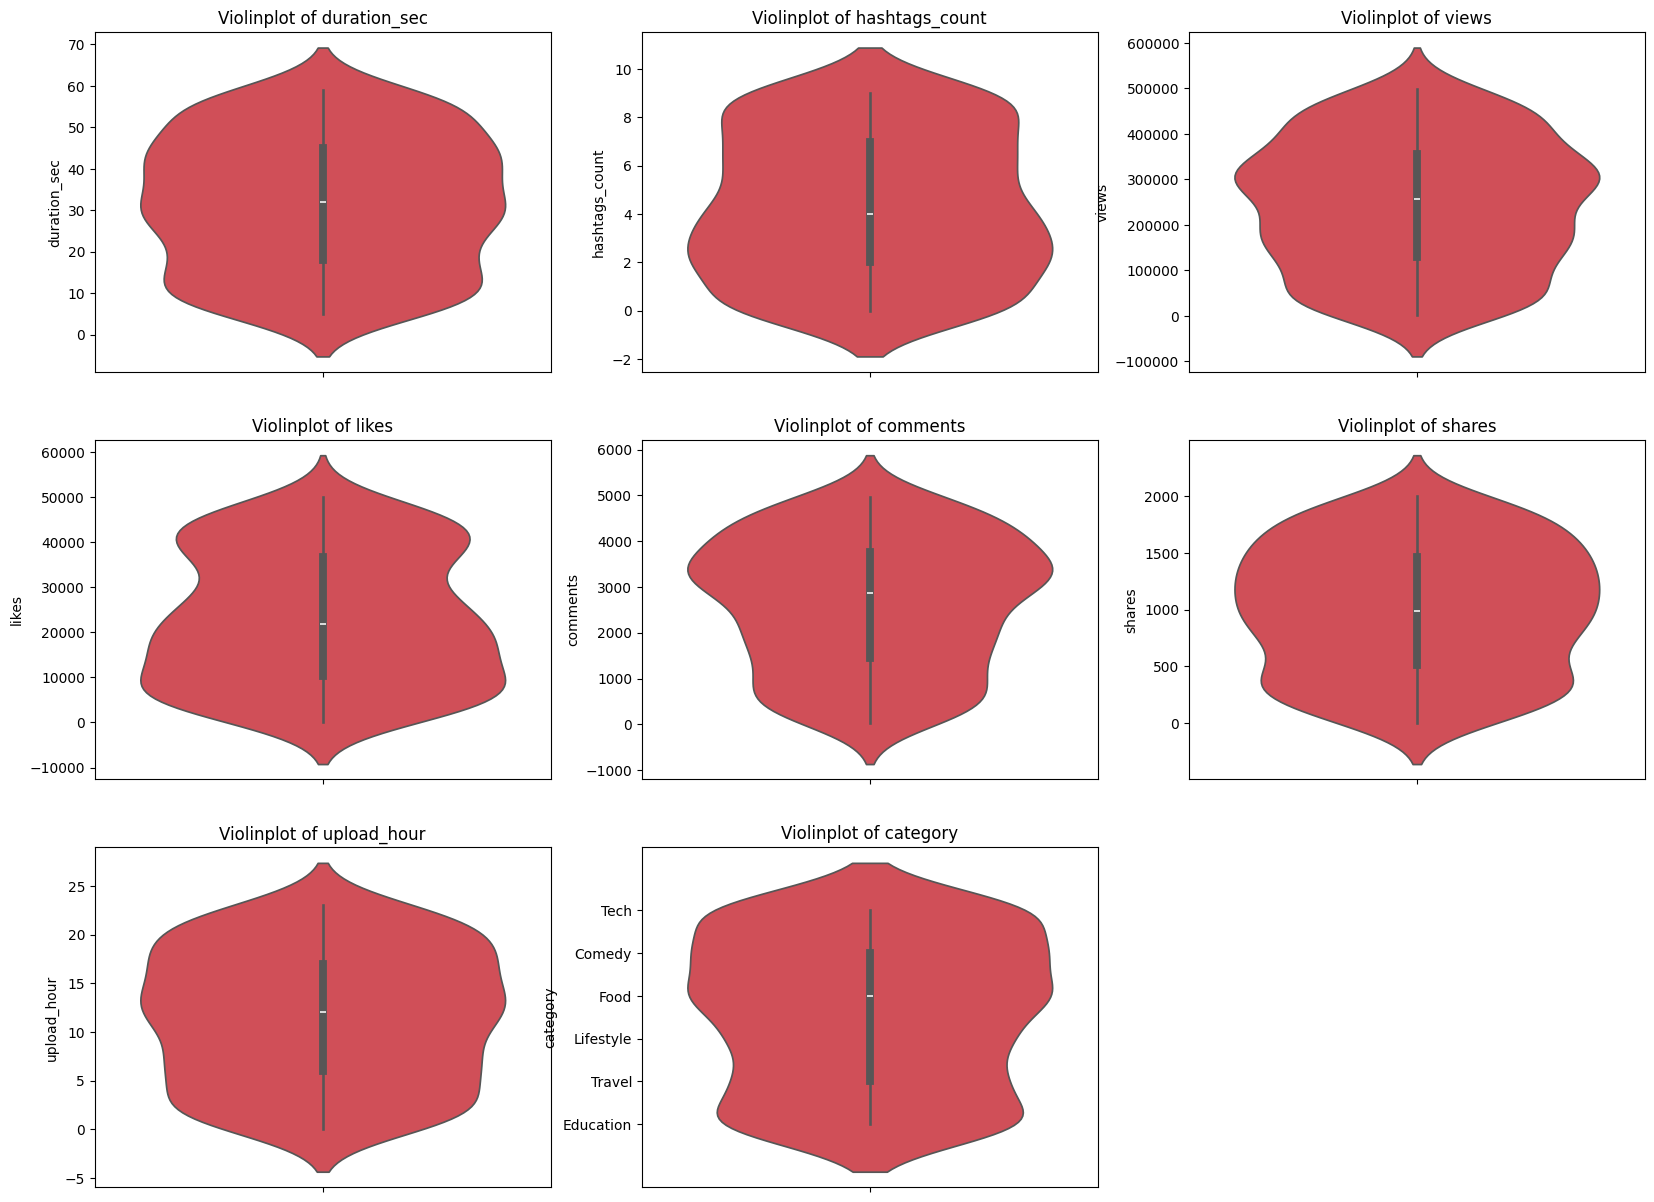

In [35]:
columns = ['duration_sec','hashtags_count','views','likes','comments','shares','upload_hour','category']

plt.figure(figsize=(20,15))
for i, col in enumerate(columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col], color= '#E63946')
    plt.title(f'Boxplot of {col}')
plt.show()

plt.figure(figsize=(20,15))
for i, col in enumerate(columns,1):
    plt.subplot(3,3,i)
    sns.violinplot(y=df[col], color= '#E63946')
    plt.title(f'Violinplot of {col}')
plt.show()

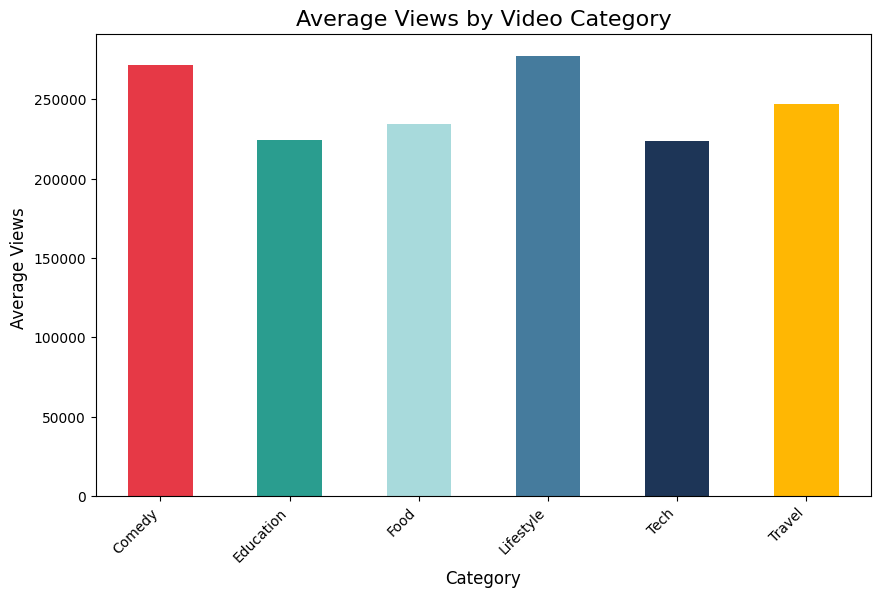

In [48]:
color = ['#E63946', '#2A9D8F','#A8DADC','#457B9D','#1D3557','#FFB703']
plt.figure(figsize=(10, 6))
df.groupby('category')['views'].mean().plot(kind = 'bar', color = color)
plt.title('Average Views by Video Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Views ', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### Conclusion:- Based on the chart, you can identify the top-performing categories (e.g., Food and lifestyle in this analysis, if they are the highest) which should be prioritized for content creation.

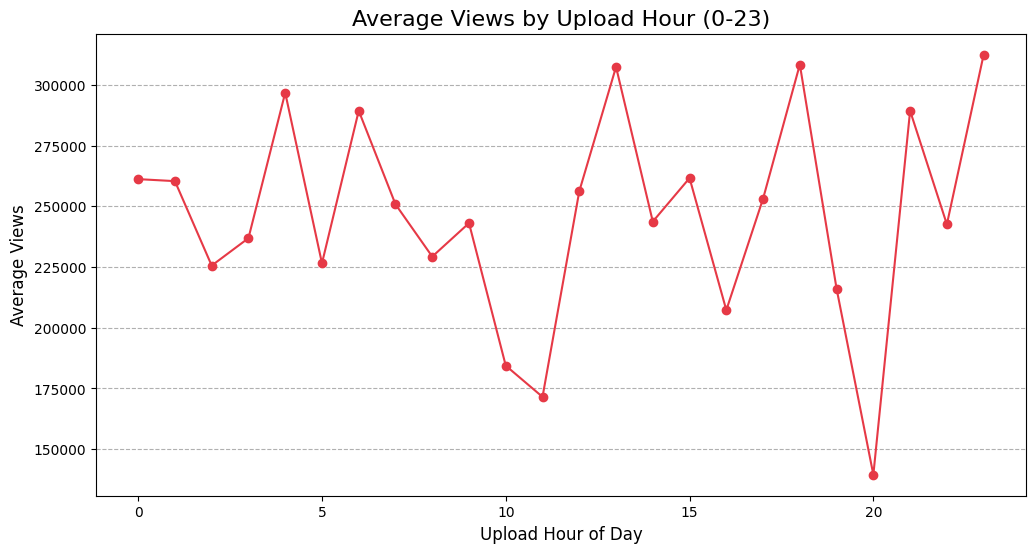

In [56]:
plt.figure(figsize=(12, 6))
df.groupby('upload_hour')['views'].mean().plot(kind='line',color='#E63946',marker='o')
plt.title('Average Views by Upload Hour (0-23)', fontsize=16)
plt.xlabel('Upload Hour of Day', fontsize=12)
plt.ylabel('Average Views', fontsize=12)
plt.grid(axis='y', linestyle='--')

### Conclusion:- Look for clear peaks in the line graph (e.g., if there's a surge around $\text{8}$ AM or $\text{18}$ PM). These hours represent the best times to post for your audience.

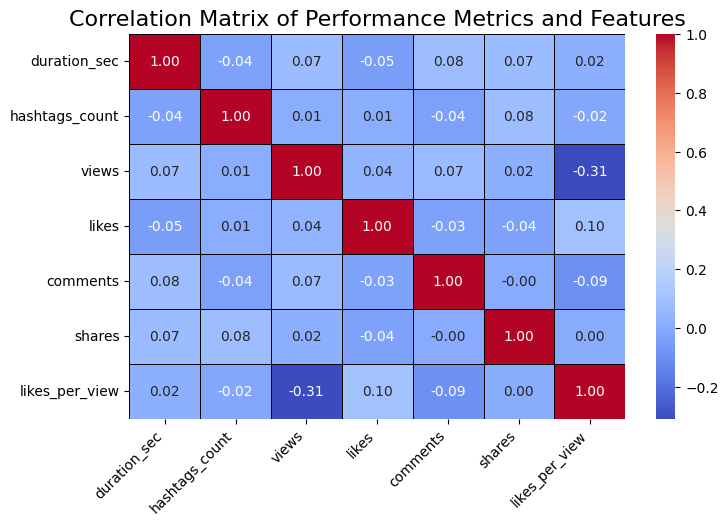

In [102]:
columns = df[['duration_sec', 'hashtags_count', 'views', 'likes', 'comments', 'shares', 'likes_per_view']]
correlation = columns.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation,annot=True,fmt=".2f",cmap='coolwarm',cbar=True,linewidths=.5,linecolor='black')
plt.title('Correlation Matrix of Performance Metrics and Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

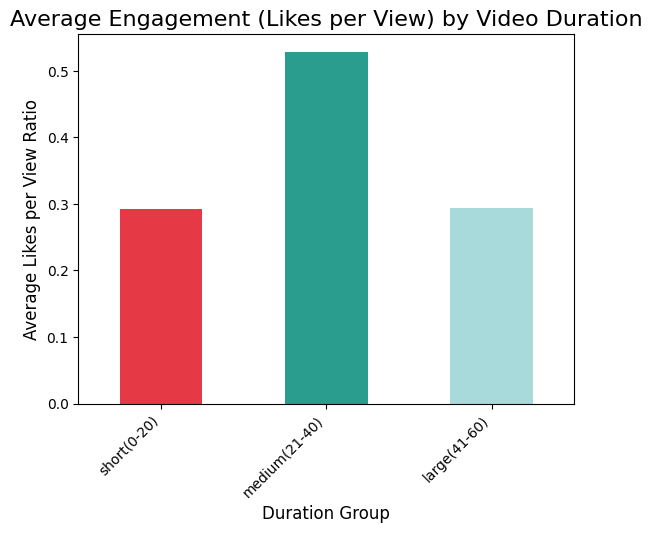

In [77]:
df['duration_group'] = pd.cut(df['duration_sec'],bins=[0, 20, 40, 60],labels=['short(0-20)', 'medium(21-40)', 'large(41-60)'])
df.groupby('duration_group')['likes_per_view'].mean().plot(kind='bar', color =['#E63946', '#2A9D8F','#A8DADC'])
plt.title('Average Engagement (Likes per View) by Video Duration', fontsize=16)
plt.xlabel('Duration Group', fontsize=12)
plt.ylabel('Average Likes per View Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### Conclusion:- The plot reveals if there is an optimal duration range for generating strong engagement. For instance, if the "Medium ($\text{21-40s}$)" bin has the highest average ratio, it suggests videos in that sweet spot are more effective at converting viewers into engagers than very short or very long Shorts. This contradicts the simple linear correlation and offers a strategic content length recommendation.

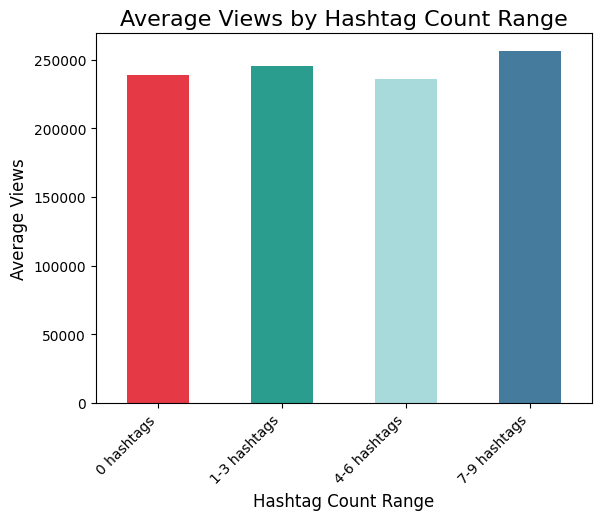

In [83]:
df['hashtag_group'] = pd.cut(df['hashtags_count'],bins=[-1, 0, 3, 6, 9],labels=['0 hashtags', '1-3 hashtags', '4-6 hashtags', '7-9 hashtags'])
df.groupby('hashtag_group')['views'].mean().plot(kind='bar', color = ['#E63946', '#2A9D8F','#A8DADC', '#457B9D'])
plt.title('Average Views by Hashtag Count Range', fontsize=16)
plt.xlabel('Hashtag Count Range', fontsize=12)
plt.ylabel('Average Views', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### Conclusion:- This visualization helps pinpoint the most effective hashtag strategy. If the "7-9 Hashtags" range shows a significantly higher average view count, it suggests that using a higher number of relevant tags is more beneficial than over-stuffing. This provides an actionable best practice for content creators.

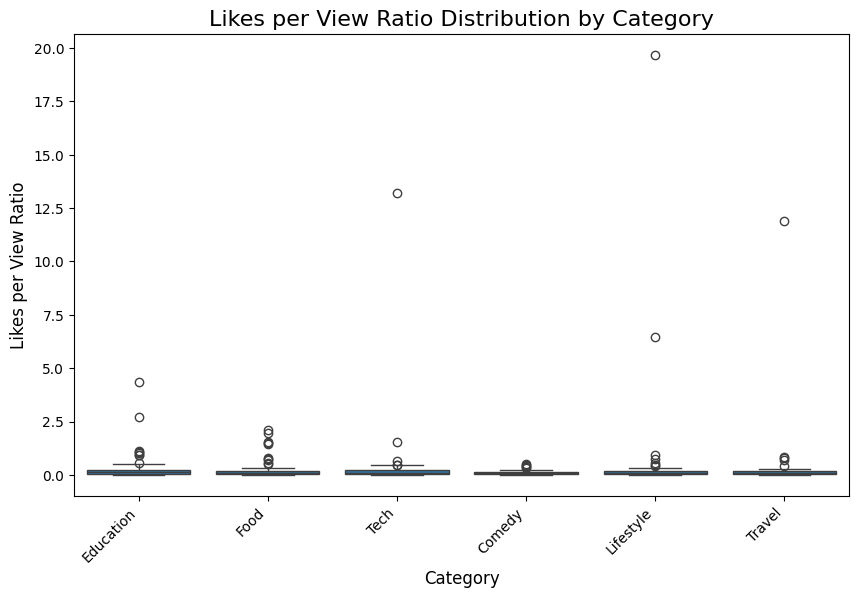

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='category',y='likes_per_view',order=df.groupby('category')['likes_per_view'].median().sort_values(ascending=False).index )
plt.title('Likes per View Ratio Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Likes per View Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


### Conclusion:- A category may not have the highest total views, but it may have the highest engagement (e.g., Lifestyle or Tech might have a higher ratio). This is vital for community building and subscriber conversion.

In [93]:
from scipy import stats

In [100]:
# ----------------------------------------------------------------------
# HYPOTHESIS TEST : Independent T-Test for Duration Bin Impact on Engagement
# ----------------------------------------------------------------------

# H0: There is NO statistically significant difference in the mean Likes per View ratio between the two duration groups.
#
# H1: The mean Likes per View ratio is statistically different between Medium (21-40s) and Short (0-20s) duration videos.

print("\n" + "="*50)
print("--- T-Test: Difference in Engagement between Duration Bins ---")
group_medium = df[df['duration_group'] == 'medium(21-40)']['likes_per_view'].values
group_short = df[df['duration_group'] == 'short(0-20)']['likes_per_view'].values
print(f"Sample Size - Medium: {len(group_medium)}")
print(f"Sample Size - Short: {len(group_short)}")


t_statistic, p_value_ttest = stats.ttest_ind(group_medium, group_short, equal_var=False)
print(f"T-Statistic (Medium vs. Short): {t_statistic:.4f}")
print(f"P-Value (Two-Tailed): {p_value_ttest:.4f}")
alpha = 0.05
if p_value_ttest < alpha:
    ttest_result = "REJECT the Null Hypothesis. The mean Likes per View ratio is statistically different between Medium (21-40s) and Short (0-20s) duration videos."
else:
    ttest_result = "FAIL TO REJECT the Null Hypothesis. There is NO statistically significant difference in the mean Likes per View ratio between the two duration groups."

print(f"\nConclusion (alpha={alpha}): {ttest_result}")

print("\n--- Summary Statistics for T-Test Groups ---")
print(f"Mean Likes/View (Medium): {np.mean(group_medium):.4f}")
print(f"Mean Likes/View (Short): {np.mean(group_short):.4f}")



--- T-Test: Difference in Engagement between Duration Bins ---
Sample Size - Medium: 108
Sample Size - Short: 89
T-Statistic (Medium vs. Short): 1.0170
P-Value (Two-Tailed): 0.3111

Conclusion (alpha=0.05): FAIL TO REJECT the Null Hypothesis. There is NO statistically significant difference in the mean Likes per View ratio between the two duration groups.

--- Summary Statistics for T-Test Groups ---
Mean Likes/View (Medium): 0.5287
Mean Likes/View (Short): 0.2916


### Conclusion:-
### Statistical Significance:-  The P-Value ($\text{0.3111}$) is greater than the standard significance level of $\alpha = \text{0.05}$.
### Result:-  You FAIL TO REJECT the Null Hypothesis ($\text{H}_0$).
### Interpretation:-  Despite the Medium duration videos having a numerically higher mean engagement ratio ($\text{0.5287}$ vs. $\text{0.2916}$), this difference is not statistically significant. This means that, within the observed variation and sample size, the apparent advantage of the Medium duration videos could be due to random chance, and we cannot confidently conclude that $\text{21-40s}$ videos generate better engagement than $\text{0-20s}$ videos across the entire population of YouTube Shorts.
### Strategic Implication:- The recommendation to focus solely on **Medium ($\text{21-40s}$) ** videos is not statistically validated by this specific test. Content creators should remain flexible, as both short and medium videos are statistically indistinguishable in terms of average engagement quality. Further segmentation (e.g., performing this T-Test within high-performing categories like Food or Tech) might be necessary to uncover category-specific optimal lengths.